<a href="https://colab.research.google.com/github/lmcanavals/acomplex/blob/main/1202_FloydWarshall.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
import numpy as np
import math
import networkx as nx
import matplotlib.pyplot as plt

In [213]:
%%file 1201a.al
1 3 3 7
0 8 2 2
0 5 3 1
0 2 

Writing 1201a.al


In [12]:
%%file 1201a.al
3 3 4 9
0 9 2 2 6 4
1 4 5 6
-
6 8
1 1 3 9
5 3 7 1
6 3

Overwriting 1201a.al


In [214]:
# LEER ARCHIVO

with open("1201a.al") as archivo:
  grafo = []
  
  for linea in archivo:
    if linea == '-\n':        # no hay nodos adyacentes
      grafo.append([])
    else:
      nums = [int(x) for x in linea.split()]
      grafo.append([(nums[i], nums[i+1]) for i in range(0, len(nums), 2)])

  cont = 0  # 1
  for x in grafo:
    print(cont, ": ", x)
    cont+=1

0 :  [(1, 3), (3, 7)]
1 :  [(0, 8), (2, 2)]
2 :  [(0, 5), (3, 1)]
3 :  [(0, 2)]


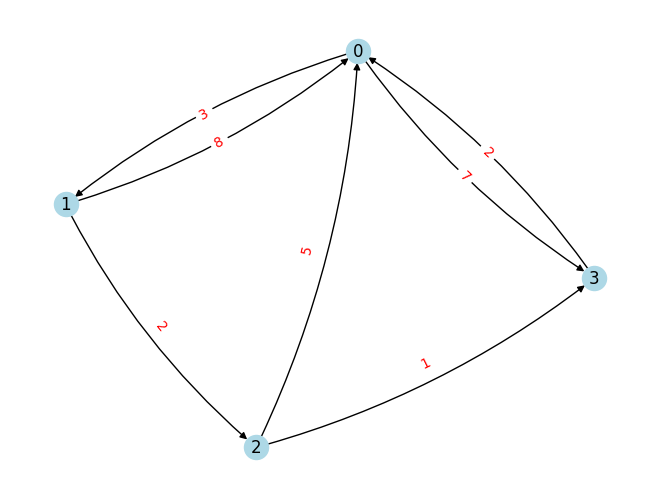

In [242]:
# GRAFO INICIAL
G = nx.DiGraph()

for i in range(4): #(1,5)
    G.add_node(i)


for nodo in range(4):
    for vecino, peso in grafo[nodo]:
        G.add_edge(nodo, vecino, length=peso)  

pos = nx.layout.spring_layout(G)

nx.draw(G, pos, with_labels=True, connectionstyle='arc3, rad = 0.1', node_color='LightBlue')
labels=dict([((u,v,),d['length']) for u,v,d in G.edges(data=True)])
nx.draw_networkx_edge_labels(G,pos,edge_labels=labels, font_color='red')

edge_labels = dict([((u, v,), f'{d["length"]}\n\n{G.edges[(v,u)]["length"]}') for u, v, d in G.edges(data=True) if pos[u][0] > pos[v][0]])
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red')
plt.show()

In [243]:
# ALGORITMO FLOYD WARSHALL desde 0
def floydWarshall(G):
    n = len(G)
    cost = np.full((n, n), math.inf)
    path = np.full((n, n), -1, dtype=int)

    for u in range(n):
        for v, w in G[u]:
            cost[u, v] = w
            path[u, v] = u

    for k in range(n):
        for i in range(n):
            for j in range(n):
                if i != j and j != k and k != i:
                    f = cost[i, k] + cost[k, j]
                    if f < cost[i, j]:
                        cost[i, j] = f
                        path[i, j] = path[k, j]

    return cost, path

In [244]:
cost, path = floydWarshall(grafo)
print(cost)
print(path)



[[inf  3.  5.  6.]
 [ 5. inf  2.  3.]
 [ 3.  6. inf  1.]
 [ 2.  5.  7. inf]]
[[-1  0  1  2]
 [ 3 -1  1  2]
 [ 3  0 -1  2]
 [ 3  0  1 -1]]


In [252]:

print("\nGrafo inicial ---")
for nodo in range(4):
    for vecino, peso in grafo[nodo]:
        print(nodo, "-", vecino, ": ", peso)  

    
print("\nCosto ---")
for nodo in range(4):
    for vecino, peso in grafo[nodo]:
        print(nodo, "-", vecino, ": ", cost[nodo][vecino]) 
        
print("\nCamino ---")
for nodo in range(4):
    for vecino, peso in grafo[nodo]:
        print(nodo, "-", vecino, ": ", path[nodo][vecino]) 


Grafo inicial ---
0 - 1 :  3
0 - 3 :  7
1 - 0 :  8
1 - 2 :  2
2 - 0 :  5
2 - 3 :  1
3 - 0 :  2

Costo ---
0 - 1 :  3.0
0 - 3 :  6.0
1 - 0 :  5.0
1 - 2 :  2.0
2 - 0 :  3.0
2 - 3 :  1.0
3 - 0 :  2.0

Camino ---
0 - 1 :  0
0 - 3 :  2
1 - 0 :  3
1 - 2 :  1
2 - 0 :  3
2 - 3 :  2
3 - 0 :  3


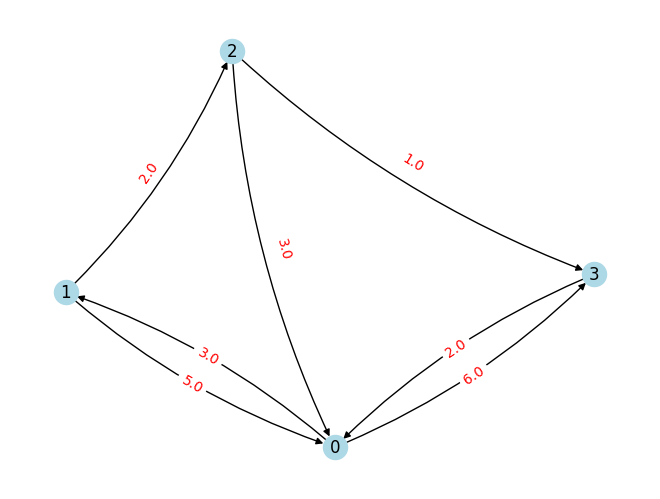

In [264]:
# GRAFO INICIAL
G = nx.DiGraph()

for i in range(4): #(1,5)
    G.add_node(i)


for nodo in range(4):
    for vecino, peso in grafo[nodo]:
        G.add_edge(nodo, vecino, length=cost[nodo][vecino])  

pos = nx.layout.spring_layout(G)

nx.draw(G, pos, with_labels=True, connectionstyle='arc3, rad = 0.1', node_color='LightBlue')
labels=dict([((u,v,),d['length']) for u,v,d in G.edges(data=True)])
nx.draw_networkx_edge_labels(G,pos,edge_labels=labels, font_color='red')

edge_labels = dict([((u, v,), f'{d["length"]}\n\n{G.edges[(v,u)]["length"]}') for u, v, d in G.edges(data=True) if pos[u][0] > pos[v][0]])
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red')
plt.show()